In [52]:
from deepface import DeepFace
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import os
import scipy.spatial
import sklearn.metrics

In [14]:
img1_path = 'C:/Users/Public/Documents/PNAS2018Images/CroppedDatabase/S1_a.png'
img2_path = 'C:/Users/Public/Documents/PNAS2018Images/CroppedDatabase/S1_b.png'

In [15]:
resp = DeepFace.verify(img1_path = img1_path, img2_path = img2_path,model_name = 'ArcFace')

In [16]:
resp

{'verified': True,
 'distance': 0.023613083607115448,
 'max_threshold_to_verify': 0.68,
 'model': 'ArcFace',
 'similarity_metric': 'cosine'}

In [21]:
list_dir = os.listdir('C:/Users/Public/Documents/PNAS2018Images/SeparatedImages/')

In [19]:
list_dir

['D1_a.png',
 'D1_b.png',
 'D2_a.png',
 'D2_b.png',
 'D3_a.png',
 'D3_b.png',
 'D4_a.png',
 'D4_b.png',
 'D5_a.png',
 'D5_b.png',
 'D6_a.png',
 'D6_b.png',
 'D7_a.png',
 'D7_b.png',
 'D8_a.png',
 'D8_b.png',
 'S10_a.png',
 'S10_b.png',
 'S11_a.png',
 'S11_b.png',
 'S12_a.png',
 'S12_b.png',
 'S1_a.png',
 'S1_b.png',
 'S2_a.png',
 'S2_b.png',
 'S3_a.png',
 'S3_b.png',
 'S4_a.png',
 'S4_b.png',
 'S5_a.png',
 'S5_b.png',
 'S6_a.png',
 'S6_b.png',
 'S7_a.png',
 'S7_b.png',
 'S8_a.png',
 'S8_b.png',
 'S9_a.png',
 'S9_b.png']

In [61]:
feature_vectors = []
for i in range(len(list_dir)):
    img1_path = 'C:/Users/Public/Documents/PNAS2018Images/CroppedDatabase/' + list_dir[i]
    var = DeepFace.represent(img1_path,model_name = 'Facenet512', enforce_detection = False,detector_backend='mtcnn')
    feature_vectors.append(var)

facenet512_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/facenet512_weights.h5
To: C:\Users\dxian\.deepface\weights\facenet512_weights.h5
100%|█████████████████████████████████████████████████████████████████████████████| 95.0M/95.0M [00:04<00:00, 19.1MB/s]


In [62]:
np.shape(feature_vectors)

(40, 512)

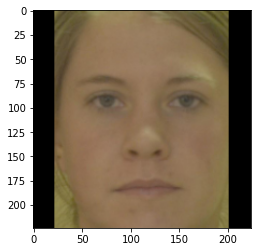

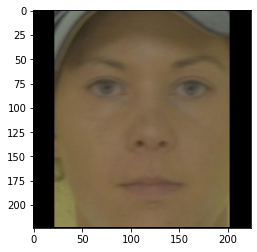

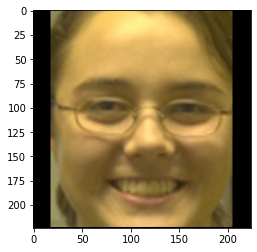

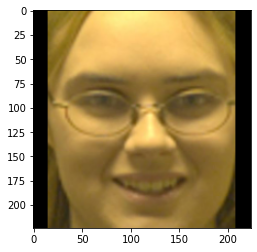

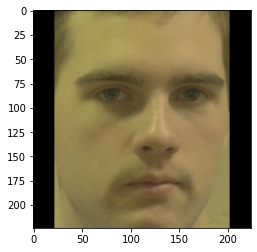

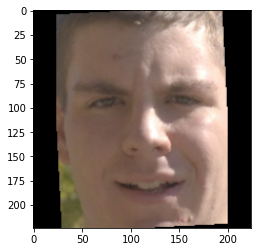

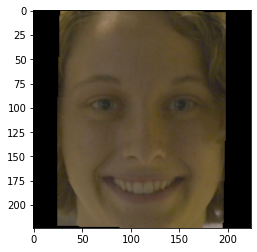

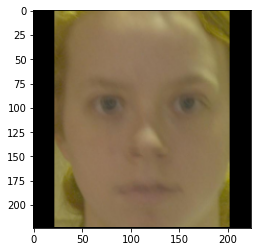

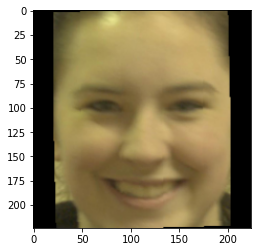

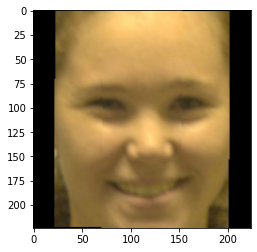

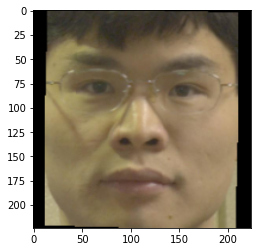

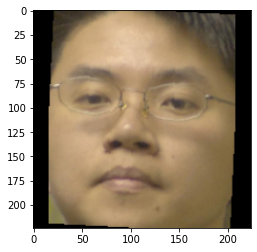

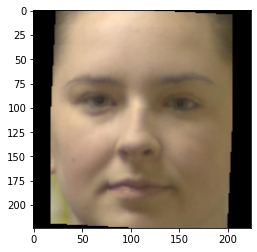

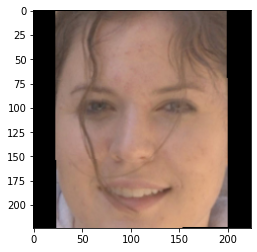

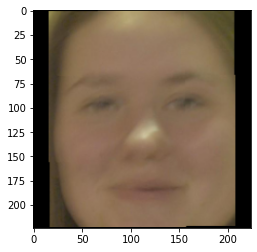

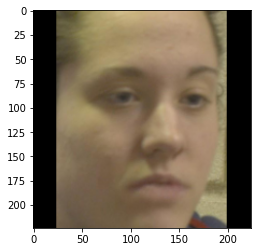

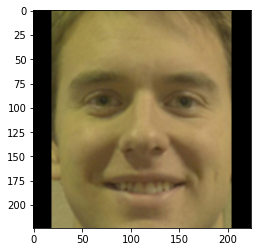

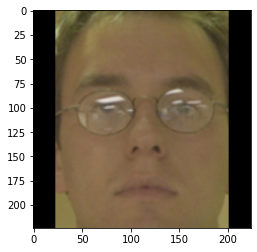

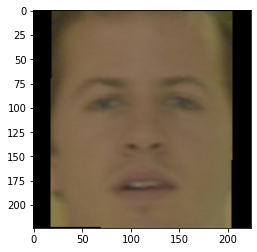

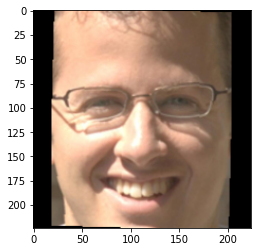

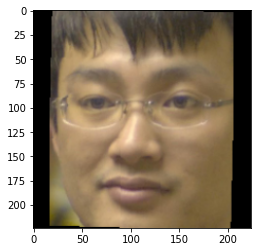

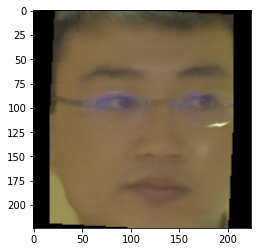

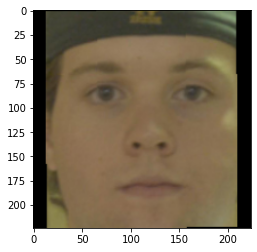

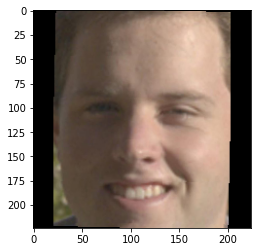

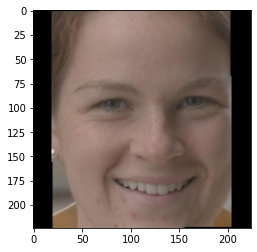

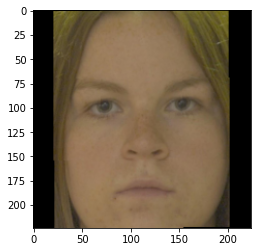

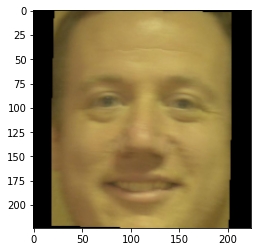

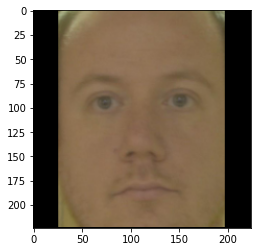

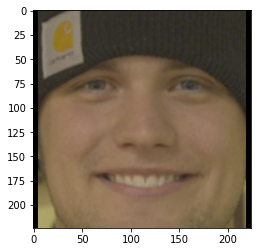

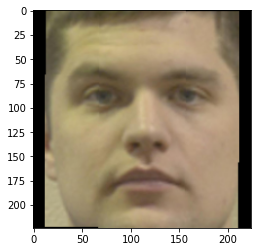

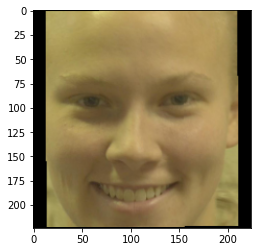

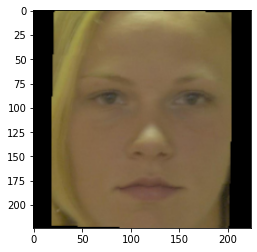

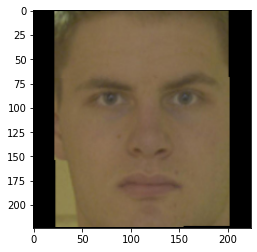

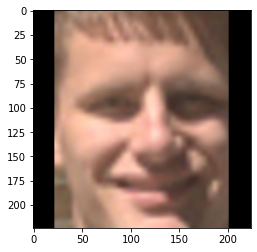

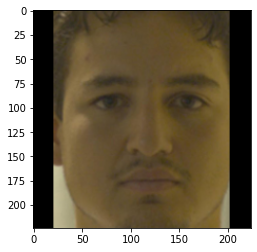

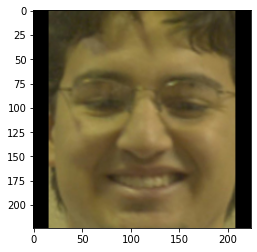

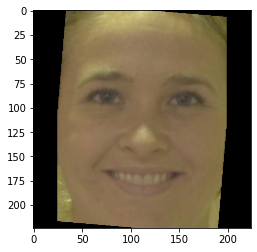

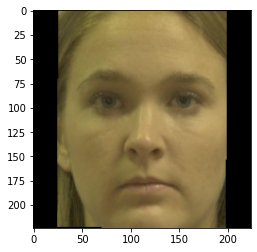

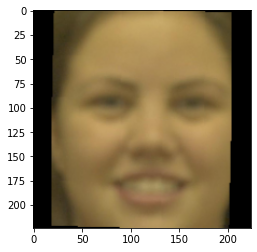

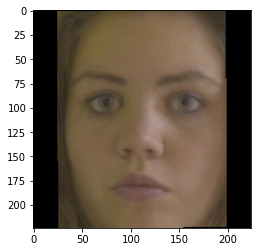

In [40]:
for i in range(len(list_dir)):
    img1_path = 'C:/Users/Public/Documents/PNAS2018Images/CroppedDatabase/' + list_dir[i]
    var = DeepFace.detectFace(img1_path,enforce_detection=True,detector_backend='mtcnn')
    plt.figure()
    plt.imshow(var)

In [49]:
euclidean_distances = []
for i in range(0,40,2):
    var1 = scipy.spatial.distance.euclidean(feature_vectors[i],feature_vectors[i+1])
    euclidean_distances.append(var1)

In [50]:
euclidean_distances

[8.71582953285795,
 12.571920753561423,
 12.124172211420479,
 2.4581101801431804,
 10.726117252824602,
 8.738816104328352,
 13.074240755467995,
 9.919676067101829,
 14.042648602873115,
 12.66666664686849,
 8.242232971158423,
 12.08875194046442,
 10.338690347672163,
 10.444817114184467,
 13.522573782103905,
 11.82256655637057,
 8.321116245114014,
 10.85648501508193,
 12.536943532220084,
 8.08921888154529]

In [51]:
list_dir

['D1_a.png',
 'D1_b.png',
 'D2_a.png',
 'D2_b.png',
 'D3_a.png',
 'D3_b.png',
 'D4_a.png',
 'D4_b.png',
 'D5_a.png',
 'D5_b.png',
 'D6_a.png',
 'D6_b.png',
 'D7_a.png',
 'D7_b.png',
 'D8_a.png',
 'D8_b.png',
 'S10_a.png',
 'S10_b.png',
 'S11_a.png',
 'S11_b.png',
 'S12_a.png',
 'S12_b.png',
 'S1_a.png',
 'S1_b.png',
 'S2_a.png',
 'S2_b.png',
 'S3_a.png',
 'S3_b.png',
 'S4_a.png',
 'S4_b.png',
 'S5_a.png',
 'S5_b.png',
 'S6_a.png',
 'S6_b.png',
 'S7_a.png',
 'S7_b.png',
 'S8_a.png',
 'S8_b.png',
 'S9_a.png',
 'S9_b.png']

In [53]:
ground_truth = []

for i in range(8):
    ground_truth.append('different') 

for i in range(12):
    ground_truth.append('same')
    


In [63]:
fpr,tpr,thresholds = sklearn.metrics.roc_curve(ground_truth,np.array(euclidean_distances),pos_label='different')

In [64]:
fpr,tpr,thresholds

(array([0.        , 0.08333333, 0.16666667, 0.16666667, 0.25      ,
        0.25      , 0.33333333, 0.33333333, 0.58333333, 0.58333333,
        0.75      , 0.75      , 1.        , 1.        ]),
 array([0.   , 0.   , 0.   , 0.125, 0.125, 0.25 , 0.25 , 0.375, 0.375,
        0.5  , 0.5  , 0.875, 0.875, 1.   ]),
 array([15.0426486 , 14.0426486 , 13.52257378, 13.07424076, 12.66666665,
        12.57192075, 12.53694353, 12.12417221, 10.85648502, 10.72611725,
        10.33869035,  8.71582953,  8.08921888,  2.45811018]))

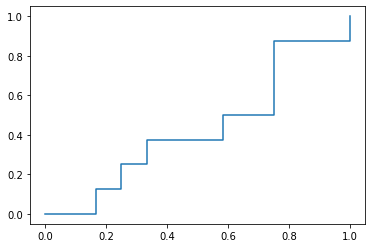

In [65]:
plt.plot(fpr,tpr)